# 데이터 불러오기

In [1081]:
import pandas as pd

In [1082]:
data = pd.read_csv("../data/beer4EDA.csv",encoding='utf-8')

# 불러온 데이터 확인

In [1083]:
data.tail(1)

,num,상품명_kor,상품명_eng,도수,원재료,홉종류,IBU,SRM,정보,생산자_kor,생산자_eng,생산지역_kor,생산지역_eng,맥주타입,가격
1142,1136,가펠 쾰쉬,Gaffel Kolsch,4.8,"정제수, 맥아, 홉, 효모",-,25,-,"에일 효모를 이용한 맥주. 에일 맥주의 고유의 청사과, 꽃, 허니 등의 고급스러운 ...",프라이빗 브루어리 가펠 베커 앤 컴퍼니,Brivatbrauerei Gaffel Becker & Company,쾰른,Koln,쾰쉬,3500


### 전처리 리스트
1. 컬럼삭제 (num, 상품명_eng, 홉종류, IBU, SRM, 정보, 생산자_eng, 생산지역_eng
2. 컬럼이름 변경({상품명_kor:상품명}, {생산자_kor:생산자},{생산지역_kor:생산지역})
3. 도수 : (상/중/하)로 나눈 후 one-hot encoding
4. 원재료 : [정제수,맥아,홉,효모]를 각각 컬럼으로 나눈 뒤 one-hot encoding
5. 생산지역 : one-hot encoding
6. 생산자 : one-hot encoding
7. 맥주타입 : one-hot encoding + 가중치
8. 가격 : (상/중/하)로 나눈 후 one-hot encoding


#### 1. 컬럼삭제 (num, 상품명_eng, 홉종류, IBU, SRM, 정보, 생산자_eng, 생산지역_eng)

In [1084]:
data.drop(['num', '상품명_eng', '홉종류', 'IBU', 'SRM', '정보', '생산자_eng', '생산지역_eng'], axis=1, inplace=True)

In [1085]:
data.head(1)

,상품명_kor,도수,원재료,생산자_kor,생산지역_kor,맥주타입,가격
0,"마튼즈, 라이거 필스너",8.0,-,마튼즈,벨기에,필스너,5850


#### 2. 컬럼이름 변경({상품명_kor:상품명}, {생산자_kor:생산자},{생산지역_kor:생산지역})

In [1086]:
data.rename(columns={'상품명_kor':'상품명','생산자_kor':'생산자','생산지역_kor':'생산지역'},inplace=True)

In [1087]:
data.head(1)

,상품명,도수,원재료,생산자,생산지역,맥주타입,가격
0,"마튼즈, 라이거 필스너",8.0,-,마튼즈,벨기에,필스너,5850


#### 3. 도수 : (상/중/하)로 나눈 후 one-hot encoding

In [1088]:
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = 'c://Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

##### 3-1. 도수의 현재 형타입인 str에서 float으로 변환
- 입력값 중에 '-'은 0으로 변환

In [1089]:
for i in range(len(data)):
    try: data['도수'][i] = float(data['도수'][i])
    except ValueError:
        data['도수'][i] = 0.0

##### 상/중/하를 나누기 위해 3-2 데이터분포 살펴보기

In [1090]:
from scipy.stats import describe

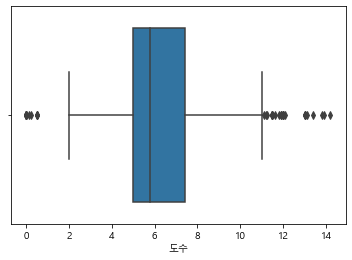

In [1091]:
sns.boxplot(data['도수'])

In [1092]:
print(describe(data['도수']))
print('1분위 수: ',np.percentile(data['도수'], 25))

DescribeResult(nobs=1143, minmax=(0.0, 14.2), mean=6.312882764654411, variance=4.428056502881309, skewness=0.6764487684533427, kurtosis=1.1795961894712503)
1분위 수:  5.0


2분위수 데이터의 밀도가 높으므로 2분위수를 기준으로 상/중/하를 나눈다
1. 6.31 초과 : 상
2. 5~6.31 : 중
3. 5 미만 : 하

##### 3-3 상/중/하로 치환

In [1093]:
for i in range(len(data)):
    if data['도수'][i] > 6.31 : data['도수'][i] = '도수(상)'
    elif data['도수'][i] < 3.5 : data['도수'][i] = '도수(하)'
    else : data['도수'][i] = '도수(중)' 

In [1094]:
data['도수'].head(3)

0    도수(상)
1    도수(상)
2    도수(중)
Name: 도수, dtype: object

(array([473.,   0.,   0.,   0.,   0., 640.,   0.,   0.,   0.,  30.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

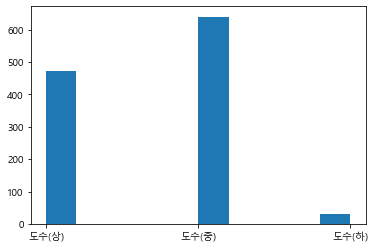

In [1095]:
plt.hist(data['도수'])

도수(상)이 다소 많음 : (1) 외국맥주 특성이 반영된 것? (2) 분리기준 잘못 세운거?<br>
인터넷 검색결과, 한국맥주는 4.2~5.3으로 해외 맥주에 비하여 도수가 낮다.<br> 따라서 도수(중 : 5~6.3)의 기준도 한국인의 기준에서 높게 반영됐다고 할 수 있다. 

##### 3-4 원-핫 인코딩

In [1096]:
도수_one_hot = pd.get_dummies(data['도수'])
도수_one_hot

,도수(상),도수(중),도수(하)
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1138,0,1,0
1139,0,1,0
1140,0,1,0
1141,0,1,0


##### 3-4 도수컬럼 삭제

In [1097]:
data.drop(['도수'], axis=1, inplace=True)

In [1098]:
data.head(1)

,상품명,원재료,생산자,생산지역,맥주타입,가격
0,"마튼즈, 라이거 필스너",-,마튼즈,벨기에,필스너,5850


#### 4. 원재료 : [정제수,맥아,홉,효모]를 각각 컬럼으로 나눈 뒤 one-hot encoding

#### 4-1 한 데이터셀 내에 값을 분리
(ex) '정제수, 보리맥아, 귀리맥아' => '정제수','보리맥아','귀리맥아'

In [1099]:
import re

In [1100]:
pattern = re.compile(',')

In [1101]:
spilted =[]
for i in range(len(data)):
    spilted.append(pattern.split(data['원재료'][i]))
spilted[:14]

[['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['정제수', ' 보리맥아', ' 귀리맥아', ' 설탕', ' 스페인 감초 분말', ' 호프', ' 효모'],
 ['정제수', ' 보리맥아', ' 호프', ' 효모']]

##### 4-2 위에서 만든 spilted의 리스트 차원을 제거하여 1차원배열로 만든다

In [1102]:
원재료=[]
for i in range(len(spilted)):
    for j in splited[i]:
        원재료.append(j)

In [1103]:
원재료[:20]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '정제수',
 ' 보리맥아',
 ' 귀리맥아',
 ' 설탕',
 ' 스페인 감초 분말',
 ' 호프',
 ' 효모',
 '정제수']

#### 4-3 글자 내 공백제거
'              정제수' => '정제수'

In [1104]:
원재료[15]

' 설탕'

In [1105]:
for i in range(len(원재료)):
    원재료[i]= re.sub('[ ]','',원재료[i])
원재료[:15]

['', '', '', '', '', '', '', '', '', '', '', '', '정제수', '보리맥아', '귀리맥아']

#### 4-3 각 성분을 unique한다.

In [1106]:
원재료 = list(pd.unique(원재료))

In [1107]:
원재료[0:10]

['', '정제수', '보리맥아', '귀리맥아', '설탕', '스페인감초분말', '호프', '효모', '옥수수', '호프추출물']

#### 4-4 공백 삭제

In [1108]:
원재료.remove('')

#### 4-5 원재료와 원본데이터 성분을 비교하기 위해 data['원재료'] 값의 공백제거

In [1109]:
type(data['원재료'])

pandas.core.series.Series

In [1110]:
for i in range(len(data)):
    data['원재료'][0]=re.sub('[ ]','',data['원재료'][i])

#### 4-5 원재료와 원본데이터 성분을 비교하기 위해 2중리스트 spilted 값의 공백제거
Series형태의 list에서 사용할 수 있는 isin을 쓰기 위함임

In [1160]:
list_a = [ [] for _ in range(len(data)) ]

In [1161]:
for i in range(len(spilted)):
    for j in spilted[i]:
        list_a[i].append(re.sub('[ ]','',j))

#### 4-6 각 원재료 성분이 있으면 1 없으면 0으로 표현

In [1230]:
list_b = [ [] for _ in range(len(원재료)) ]
작성중...

SyntaxError: invalid syntax (<ipython-input-1230-5d9df5184939>, line 2)

#### 5. 생산지역 : one-hot encoding

#### 6. 생산자 : one-hot encoding

#### 7. 맥주타입 : one-hot encoding + 가중치

#### 8. 가격 : (상/중/하)로 나눈 후 one-hot encoding

#### 9. 각 one-hot Encoding한 컬럼들을 원본데이터에 합치기

### 전처리 결과확인
전처리리스트
1. 컬럼삭제 (num, 상품명_eng, 홉종류, IBU, SRM, 정보, 생산자_eng, 생산지역_eng
2. 컬럼이름 변경({상품명_kor:상품명}, {생산자_kor:생산자},{생산지역_kor:생산지역})
3. 도수 : (상/중/하)로 나눈 후 one-hot encoding
4. 원재료 : [정제수,맥아,홉,효모]를 각각 컬럼으로 나눈 뒤 one-hot encoding
5. 생산지역 : one-hot encoding
6. 생산자 : one-hot encoding
7. 맥주타입 : one-hot encoding + 가중치
8. 가격 : (상/중/하)로 나눈 후 one-hot encoding

### 추천용 데이터로 저장

In [323]:
data.to_csv('beer4REC.csv', encoding='utf-8-sig',index=False)